# `ES 157` Section 1: Introduction to Signals

For the first few weeks we are going to learn how to work with basic signals, examine properties of signals and systems, and get some exposure to the Fourier analysis. Our work will culminate in an analysis and modeling of Massachusetts (or your home state's) COVID-19 data. 
![covid_mass](https://i.imgur.com/bI1umxq.png)
This week we'll start off by a basic introduction to `Python` and `numpy`. Then, we will create some fundamental signals and we'll perform basic operations on them. 

At the end of this notebook you will know
1. the basics of `Python`'s syntax,
2. how to create basic signals using `numpy`, and
3. how to use `Python` to perform basic signal operations.

First, let us import some of libraries that we will be using.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

## Python introduction 🐍

`Python` is a high-level programming language that is easy to learn and experiment with. Let's familiarze ourselves with the syntax and basic operations.

In [2]:
# let's start with the cliché and print "Hello world!"
print("Hello world!")

# let's now exponentiate 2 by 3 and multiply by 42
print((2 ** 3) * 42)

# let's use `numpy` to create a random vector with 10 elements
x = np.random.randn(10)
print(x)

Hello world!
336
[-1.61506016  1.78287078 -0.52509041  1.02896115 -1.23698001 -0.34639211
  0.77793917  0.97951207 -0.00823114 -0.36228497]


In vanilla `Python` almost everything is treated as a _list_ of items. It is important to become proficient with `Python`'s _list slicing_ and _indexing_.

In [3]:
# from the random vector we created, we will print the first element
print(x[0])

# and the last element
print(x[-1])

# print the indices from 3 to 5
print(x[2:6])

# and all the indixes after 2
print(x[2:])

# print every other index
print(x[::2])

# print everything after the 3rd to last element
print(x[-3:])

# print, in reverse order, everything from the 3rd to last to the 3rd index
print(x[-3:2:-1])

-1.6150601572925818
-0.36228496965888546
[ 1.02896115 -1.23698001]
[-0.52509041  1.02896115 -1.23698001 -0.34639211  0.77793917  0.97951207
 -0.00823114 -0.36228497]
[-1.61506016 -0.52509041 -1.23698001  0.77793917 -0.00823114]
[ 0.97951207 -0.00823114 -0.36228497]
[ 0.97951207  0.77793917 -0.34639211 -1.23698001]


## Fundamental signals

Having familiarized oursleves with `Python` we will create and plot a few fundamental signals. We will set the number of samples to `N=20` for all the signals we'll create.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

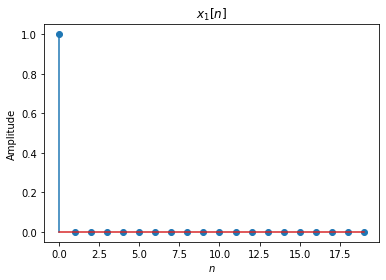

In [4]:
N = 20

# create unit sample signal
x_1 = np.zeros((N,))
x_1[0] = 1

# plot the signal as a stemplot
plt.stem(x_1)
plt.title("$x_1[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0, 0.5, 'Amplitude')

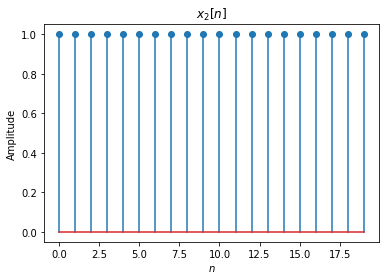

In [5]:
# create a unit step
x_2 = np.ones((N,))

# plot the signal as a stemplot
plt.stem(x_2)
plt.title("$x_2[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

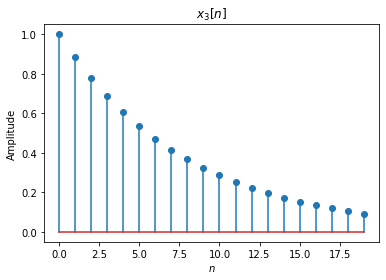

In [6]:
# create an exponential signal
x_3 = range(N)
x_3 = [np.e ** (-0.125 * idx) for idx in x_3]

# plot the signal as a stemplot
plt.stem(x_3)
plt.title("$x_3[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

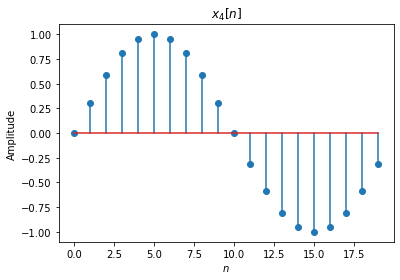

In [7]:
# create a sinusoidal signal
x_4 = range(N)
x_4 = [np.sin(1  / 10 * np.pi * idx) for idx in x_4]

# plot the signal as a stemplot
plt.stem(x_4)
plt.title("$x_4[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

## Signal operations

Having computed some basic signals we will turn our attention to basic signal operations.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0, 0.5, 'Amplitude')

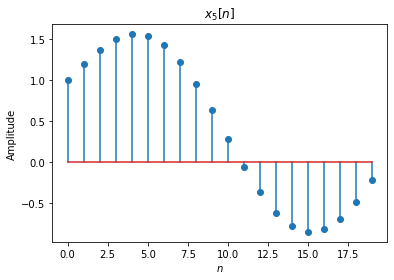

In [8]:
# add the exponential and the sinusoidal signal
x_5 = [x_3[idx] + x_4[idx] for idx in range(len(x_3))]

# plot the signal as stemplot
plt.stem(x_5)
plt.title("$x_5[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

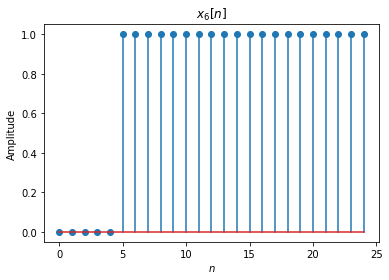

In [9]:
# delay the unit step by 5
x_delay = np.zeros((5,))
x_6 = np.concatenate((x_delay, x_2))

# plot the signal as stemplot
plt.stem(x_6)
plt.title("$x_6[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

That's all for this week! Hopefully you got accustomed to the basics of `Python` and learned how to create and manipulate some simple signals. Please take a minute to fill out this week's feedback [form]().